<a href="https://colab.research.google.com/github/Thom-ar/Matrizdeconfusao/blob/main/Construindo_uma_Matriz_de_Confus%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Retirado do site e modificado para apresentar as métricas de forma separada conforme indicado anteriormente: https://medium.com/@ingoreichertjr/construindo-uma-matriz-de-confus%C3%A3o-em-python-e-utilizando-a-m%C3%A9trica-classification-report-8c0150f4a269

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Carregando os Dados

In [4]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


#Tratando os dados

Como é possível perceber, nosso dataset possui 4 variáveis categóricas que terão que ser transformadas para poderem ser levadas para o modelo. Aplicaremos a função get_dummies do pandas para realizar essas transformações.

In [5]:
# Criando a variável dummy de Education
dummies_education = pd.get_dummies(df['Education']).rename(columns=lambda x: 'education_' + str(x))

In [6]:
# Criando a variável dummy de City
dummies_city = pd.get_dummies(df['City']).rename(columns=lambda x: 'city_' + str(x))
# Criando a variável dummy de Gender
dummies_gender = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'gender_' + str(x))
# Criando a variável dummy de EverBenched
dummies_ever_benched = pd.get_dummies(df['EverBenched']).rename(columns=lambda x: 'ever_benched_' + str(x))
# Concatemos as novas variáveis ao nosso dataset
df = pd.concat([df, dummies_education, dummies_city, dummies_gender, dummies_ever_benched], axis=1)
# Excluímos as variáveis originais
df = df.drop(['Education', 'City', 'Gender', 'EverBenched'], axis=1)
df.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,education_Bachelors,education_Masters,education_PHD,city_Bangalore,city_New Delhi,city_Pune,gender_Female,gender_Male,ever_benched_No,ever_benched_Yes
0,2017,3,34,0,0,True,False,False,True,False,False,False,True,True,False
1,2013,1,28,3,1,True,False,False,False,False,True,True,False,True,False
2,2014,3,38,2,0,True,False,False,False,True,False,True,False,True,False
3,2016,3,27,5,1,False,True,False,True,False,False,False,True,True,False
4,2017,3,24,2,1,False,True,False,False,False,True,False,True,False,True


Com essas alterações o nosso dataset manteve as 4653 linhas mas passou a ter 15 colunas.

#Compreendendo a nossa variável target

A nossa variável target preve se o funcionário vai sair ou não da empresa. Sendo “sim” o número 1 e “não” é o número 0.

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


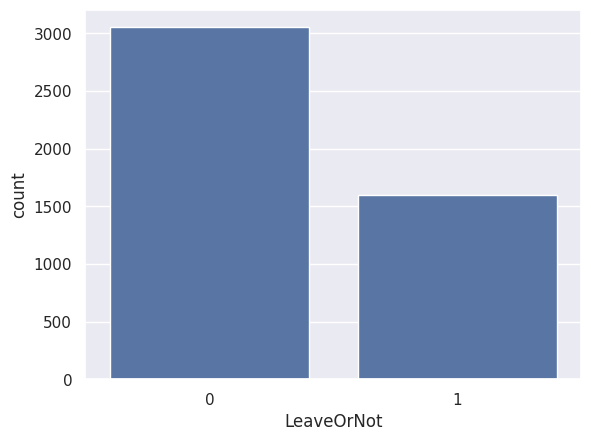

In [7]:
print(df['LeaveOrNot'].value_counts())
sns.set_theme()
sns.countplot(x='LeaveOrNot', data=df)
plt.show()

#Criando o modelo

Para esse modelo utilizaremos a regressão logística, por se tratar de um algorítmo simples de classificação e de fácil comprreensão.

In [8]:
# Separando as variáveis independentes
X = df.drop('LeaveOrNot', axis=1)

In [9]:
# Separando a variável target
y = df['LeaveOrNot']
# Fazendo o split dos dados
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
# Construindo o modelo
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
pred_clf = clf.predict(X_test)

#Construindo a Matriz de Confusão

Para construirmos a matriz de confusão é necessário importar a função confusion_matrix do pacote metrics do sckit-learn.

In [10]:
# Matriz de confusão
cf_matrix = confusion_matrix(y_test, pred_clf)
cf_matrix

array([[827,  93],
       [259, 217]])

Perceba que passamos o nosso y_test e os resultados da nossa previsão, e ele automaticamente formou a matriz de confusão.

Se quisermos deixar ela de maneira mais visual, também é possível criar um heatmap.

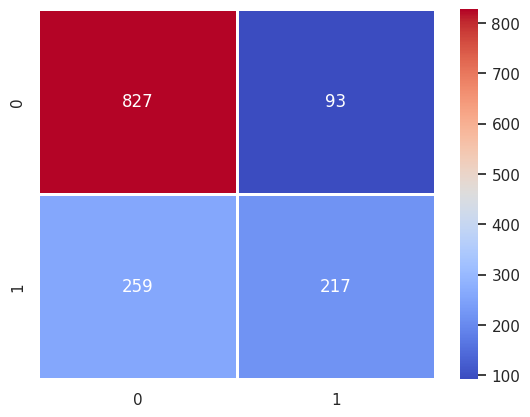

In [11]:
# Criando o heatmap
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

#Precisão

In [14]:
print(precision_score(y_test, pred_clf))

0.7


#Sensibilidade

In [15]:
print(recall_score(y_test, pred_clf))

0.45588235294117646


#F1-Score

In [16]:
f1 = f1_score(y_test, pred_clf)
print('F1-score:', f1)

F1-score: 0.5521628498727735


#Suporte

In [17]:
from collections import Counter

support = Counter(y_test)
print('Suporte:', support)

Suporte: Counter({0: 920, 1: 476})


#Acurácia

In [18]:
accuracy = accuracy_score(y_test, pred_clf)
print('Acurácia:', accuracy)

Acurácia: 0.7478510028653295


#Especificidade

In [19]:
# Matriz de confusão
cf_matrix = confusion_matrix(y_test, pred_clf)

In [20]:
# Extrair TN e FP da matriz de confusão
TN = cf_matrix[0, 0]  # Verdadeiros Negativos
FP = cf_matrix[0, 1]  # Falsos Positivos

In [21]:
# Calcular a especificidade
specificity = TN / (TN + FP)

print('Especificidade:', specificity)

Especificidade: 0.8989130434782608
